# Exercise 3.03: Illustrating the K-Nearest Neighbors Classifier Algorithm in Matplotlib

Suppose we have a list of employee data. Our features are the number of hours worked per week and the yearly salary. Our label indicates whether an employee has stayed with our company for more than 2 years. The length of stay is represented by zero if it is less than 2 years and one if it is greater than or equal to 2 years.

We want to create a three-nearest neighbors classifier that determines whether an employee will stay with our company for at least 2 years.

Then, we would like to use this classifier to predict whether an employee with a request to work 32 hours a week and earning 52,000 dollars per year is going to stay with the company for 2 years or not.

Follow these steps to complete this exercise:

1.- Import the pandas package as pd

In [1]:
import pandas as pd

2.- Create a new variable called file_url(), which will contain the URL to the raw dataset. Use the `data/employees_churned.csv` file

In [2]:
file_url = 'https://raw.githubusercontent.com/applied-data-mining-master/syllabus_intelligencesystems/main/data/employees_churned.csv'

3.- Load the data using the `pd.read_csv()` method:

In [3]:
df = pd.read_csv(file_url)

4.- Print the rows of the DataFrame

Output:

![Figure 3.11](img/fig3_11.jpg)

In [4]:
df

,hours_worked,salary,over_two_years
0,20,50000,0
1,24,45000,0
2,32,48000,0
3,24,55000,0
4,40,50000,0
5,40,62000,1
6,40,48000,1
7,32,55000,1
8,40,72000,1
9,32,60000,1


5.- Import `preprocessing` from `scikit-learn`

In [5]:
from sklearn import preprocessing

6.- Instantiate a `MinMaxScaler` with `feature_range=(0,1)` and save it to a variable called `scaler`

In [6]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

7.- Scale the DataFrame using `.fit_transform()`, save the results in a new variable called `scaled_employees`, and print its content

Output:

```
array([[0.        , 0.18518519, 0.        ],
       [0.2       , 0.        , 0.        ],
       [0.6       , 0.11111111, 0.        ],
       [0.2       , 0.37037037, 0.        ],
       [1.        , 0.18518519, 0.        ],
       [1.        , 0.62962963, 1.        ],
       [1.        , 0.11111111, 1.        ],
       [0.6       , 0.37037037, 1.        ],
       [1.        , 1.        , 1.        ],
       [0.6       , 0.55555556, 1.        ]])
```

In [7]:
scaled_employees = scaler.fit_transform(df)
scaled_employees

array([[0.        , 0.18518519, 0.        ],
       [0.2       , 0.        , 0.        ],
       [0.6       , 0.11111111, 0.        ],
       [0.2       , 0.37037037, 0.        ],
       [1.        , 0.18518519, 0.        ],
       [1.        , 0.62962963, 1.        ],
       [1.        , 0.11111111, 1.        ],
       [0.6       , 0.37037037, 1.        ],
       [1.        , 1.        , 1.        ],
       [0.6       , 0.55555556, 1.        ]])

8.- From the scaled data, extract each of the three columns and save them into three variables called `hours_worked`, `salary`, and `over_two_years`

In [8]:
hours_worked = scaled_employees[:, 0]
salary = scaled_employees[:, 1]
over_two_years = scaled_employees[:, 2]

9.- Import the `matplotlib.pyplot` package as `plt`

In [9]:
import matplotlib.pyplot as plt

10.- Create two scatter plots with `plt.scatter` using `hours_worked` as the x-axis and `salary` as the y-axis, and then create different markers according to the value of `over_two_years`. You can add the labels for the x and y axes with `plt.xlabel` and `plt.ylabel`. Display the scatter plots with `plt.show()`.


Output

![Figure 3.12](img/fig3_12.jpg)

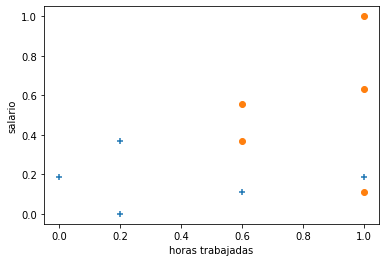

In [10]:
plt.scatter(hours_worked[:5], salary[:5], marker='+')
plt.scatter(hours_worked[5:], salary[5:], marker='o')
plt.xlabel("horas trabajadas")
plt.ylabel("salario")
plt.show()

we have displayed the data points of the scaled data on a scatter plot. The `+` points represent the employees that stayed less than 2 years, while the `o` ones are for the employees who stayed for more than 2 years.

Now, let's say we got a new observation and we want to calculate the Euclidean distance with the data from the scaled dataset.

11.- Create a new variable called `observation` with the coordinates $(0.5, 0.26)$

In [11]:
observation = [0.5, 0.26]

12.- Import the `euclidean_distances` function from `sklearn.metrics.pairwise`

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

13.- Create a new variable called `features`, which will extract the first two columns of the scaled dataset

In [13]:
features = scaled_employees[:, :2]

14.- Calculate the Euclidean distance between `observation` and `features` using `euclidean_distances`, save it into a variable called `dist`, and print its value

Output:

```
array([[0.50556627, 0.39698866, 0.17935412, 0.3196586 , 0.50556627,
        0.62179262, 0.52169714, 0.14893495, 0.89308454, 0.31201456]])
```

In [14]:
dist = euclidean_distances([observation], features)
dist

array([[0.50556627, 0.39698866, 0.17935412, 0.3196586 , 0.50556627,
        0.62179262, 0.52169714, 0.14893495, 0.89308454, 0.31201456]])